In [37]:
import pandas as pd
import numpy as np

# 1. Load Data
print("Loading data...")
df = pd.read_csv('/content/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2018_release_20250202.csv')

# 2. Define columns to keep
columns_to_keep = [
    'StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID',
    'Population2010', 'ACCESS2_CrudePrev', 'ARTHRITIS_CrudePrev',
    'BINGE_CrudePrev', 'BPHIGH_CrudePrev', 'BPMED_CrudePrev',
    'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'CHECKUP_CrudePrev',
    'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev', 'COPD_CrudePrev',
    'COREM_CrudePrev', 'COREW_CrudePrev', 'CSMOKING_CrudePrev',
    'DENTAL_CrudePrev', 'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev',
    'KIDNEY_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev',
    'MHLTH_CrudePrev', 'OBESITY_CrudePrev', 'PAPTEST_CrudePrev',
    'PHLTH_CrudePrev'
]

# 3. Clean Data
print("Cleaning data...")
df_clean = df[columns_to_keep].copy()

# 4. Handle null values with mean imputation
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# 5. Create health categories
health_categories = {
    'health_outcomes': [
        'DIABETES_CrudePrev', 'CANCER_CrudePrev', 'BPHIGH_CrudePrev',
        'KIDNEY_CrudePrev', 'COPD_CrudePrev', 'ARTHRITIS_CrudePrev'
    ],
    'unhealthy_behaviors': [
        'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'LPA_CrudePrev',
        'OBESITY_CrudePrev'
    ],
    'prevention': [
        'CHECKUP_CrudePrev', 'DENTAL_CrudePrev', 'CHOLSCREEN_CrudePrev',
        'COLON_SCREEN_CrudePrev', 'MAMMOUSE_CrudePrev', 'PAPTEST_CrudePrev'
    ]
}

# Fix Population2010 column by removing commas and converting to integer
df_clean['Population2010'] = df_clean['Population2010'].astype(str).str.replace(',', '').astype(int)


# 6. Add region mapping
regions = {
    'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'Midwest': ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
    'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'OK', 'TX'],
    'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']
}

# Function to map states to regions
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'

# Add region column
df_clean['region'] = df_clean['StateAbbr'].apply(get_region)

# 7. Add derived columns
# Add health_measure column (random selection from all measures)
all_measures = [col for category in health_categories.values() for col in category]
df_clean['health_measure'] = np.random.choice(all_measures, size=len(df_clean))

# Add categories column
def get_category(measure):
    for category, measures in health_categories.items():
        if measure in measures:
            return category
    return 'other'

df_clean['categories'] = df_clean['health_measure'].apply(get_category)

# 8. Save cleaned dataset
print("Saving cleaned data...")
df_clean.to_csv('cleaned_500_cities_data.csv', index=False)
print("Cleaned data saved successfully!")

# 9. Display summary
print("\nCleaned Dataset Summary:")
print(f"Number of rows: {len(df_clean)}")
print(f"Number of columns: {len(df_clean.columns)}")
print("\nColumns in cleaned dataset:")
print(df_clean.columns.tolist())
print("\nRegion distribution:")
print(df_clean['region'].value_counts())

Loading data...
Cleaning data...
Saving cleaned data...


<ipython-input-37-0483aac25731>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)


Cleaned data saved successfully!

Cleaned Dataset Summary:
Number of rows: 27210
Number of columns: 33

Columns in cleaned dataset:
['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID', 'Population2010', 'ACCESS2_CrudePrev', 'ARTHRITIS_CrudePrev', 'BINGE_CrudePrev', 'BPHIGH_CrudePrev', 'BPMED_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev', 'COPD_CrudePrev', 'COREM_CrudePrev', 'COREW_CrudePrev', 'CSMOKING_CrudePrev', 'DENTAL_CrudePrev', 'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev', 'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'PHLTH_CrudePrev', 'region', 'health_measure', 'categories']

Region distribution:
region
West         8975
South        8694
Midwest      5264
Northeast    4277
Name: count, dtype: int64


In [36]:
df_melted.columns

Index(['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID',
       'Population2010', 'Longitude', 'Latitude', 'HealthMeasure', 'Value',
       'Categories', 'Region'],
      dtype='object')

In [39]:
final_df=pd.read_csv('/content/cleaned_500_cities_data.csv')

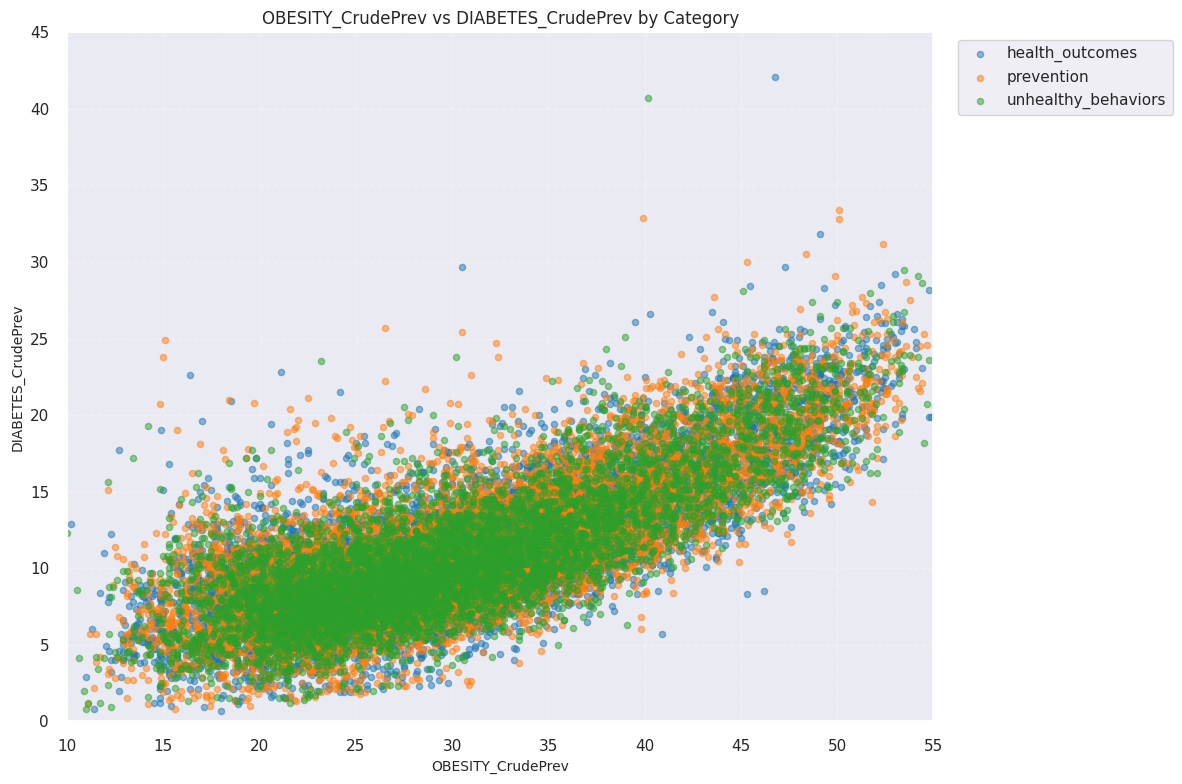

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(12, 8))


# Plotting points for each category with specific colors
for category, color in zip(['health_outcomes', 'prevention', 'unhealthy_behaviors'],
                         ['#1f77b4', '#ff7f0e', '#2ca02c']):  # Blue, Orange, Green
    mask = final_df['categories'] == category
    plt.scatter(
        final_df[mask]['OBESITY_CrudePrev'],
        final_df[mask]['DIABETES_CrudePrev'],
        alpha=0.5,        # Transparency
        s=20,            # Point size
        label=category,
        color=color
    )

# Customize the plot
plt.title('OBESITY_CrudePrev vs DIABETES_CrudePrev by Category', fontsize=12)
plt.xlabel('OBESITY_CrudePrev', fontsize=10)
plt.ylabel('DIABETES_CrudePrev', fontsize=10)

# Set axis limits
plt.xlim(10, 55)
plt.ylim(0, 45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.3)

# Legend position and style
plt.legend(bbox_to_anchor=(1.02, 1),
          loc='upper left',
          frameon=True)

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig('obesity_vs_diabetes_scatter.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

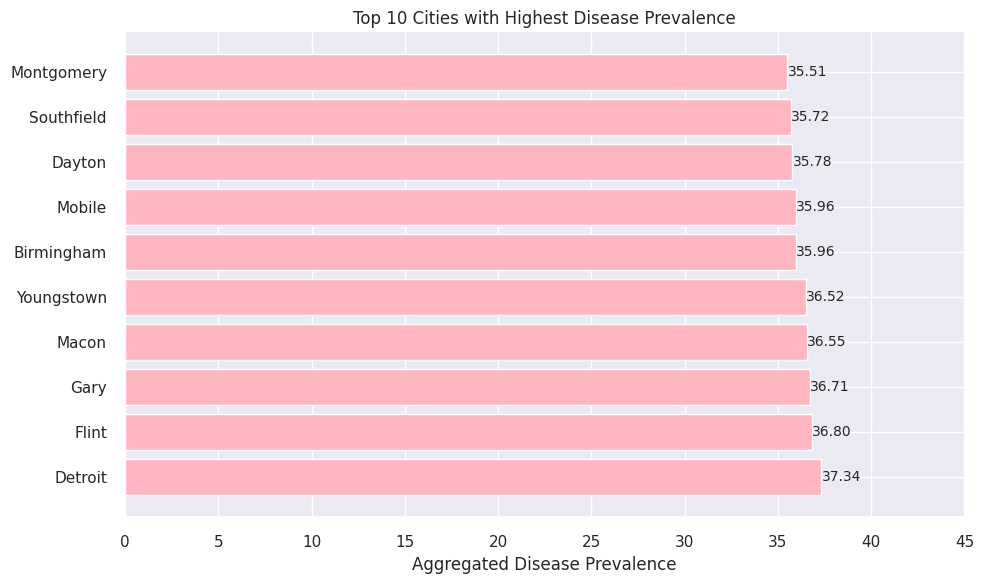


Exact values for verification:
Detroit: 37.34
Flint: 36.80
Gary: 36.71
Macon: 36.55
Youngstown: 36.52
Birmingham: 35.96
Mobile: 35.96
Dayton: 35.78
Southfield: 35.72
Montgomery: 35.51


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define disease prevalence columns
disease_columns = [
    'ACCESS2_CrudePrev', 'ARTHRITIS_CrudePrev', 'BINGE_CrudePrev',
    'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev',
    'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev',
    'COPD_CrudePrev', 'CSMOKING_CrudePrev', 'DENTAL_CrudePrev',
    'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev',
    'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev',
    'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'PHLTH_CrudePrev'
]

# Calculate aggregated disease prevalence for each city
city_prevalence = final_df.groupby('PlaceName')[disease_columns].mean().mean(axis=1)
top_10_cities = city_prevalence.nlargest(10)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))

# Create bars with the exact pink color
plt.barh(y=range(len(top_10_cities)),
         width=top_10_cities,
         color='#FFB6C1',  # Light pink
         edgecolor='white')

# Customize the plot
plt.yticks(range(len(top_10_cities)), top_10_cities.index)
plt.xlabel('Aggregated Disease Prevalence')
plt.title('Top 10 Cities with Highest Disease Prevalence')

# Add value labels on the bars
for i, v in enumerate(top_10_cities):
    plt.text(v, i, f'{v:.2f}',
             va='center',
             ha='left',
             fontsize=10)

# Set x-axis limits
plt.xlim(0, 45)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()


plt.show()

# Print exact values
print("\nExact values for verification:")
for city, value in top_10_cities.items():
    print(f"{city}: {value:.2f}")

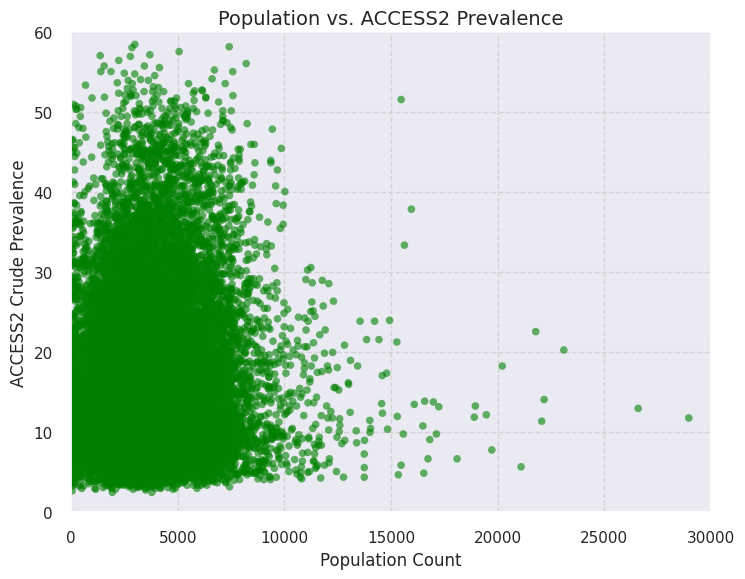

In [40]:
import matplotlib.pyplot as plt

# Extract relevant data
x = final_df['Population2010']
y = final_df['ACCESS2_CrudePrev']

# Create scatter plot with custom attributes
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='green', alpha=0.6, s=30, edgecolor='none')

# Set labels and title
plt.xlabel("Population Count", fontsize=12)
plt.ylabel("ACCESS2 Crude Prevalence", fontsize=12)
plt.title("Population vs. ACCESS2 Prevalence", fontsize=14)

# Set axis limits to match the original
plt.xlim(0, 30000)
plt.ylim(0, 60)

# Customize grid style
plt.grid(color='lightgray', linestyle='--', linewidth=1)

# Improve spacing between elements
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show plot
plt.show()